In [21]:
from utils.MLP import MLPSequential
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import get_df, set_data_for_model
import seaborn as sns

import pandas as pd


Added layer with 10 neurons and relu activation.
Added layer with 2 neurons and softmax activation.
Model compiled successfully.
Weights and biases updated.
Epoch 1/100 - loss: 0.4928 - val_loss: 0.4740 - accuracy: 0.8264 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 2/100 - loss: 0.4924 - val_loss: 0.4736 - accuracy: 0.8264 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 3/100 - loss: 0.4920 - val_loss: 0.4732 - accuracy: 0.8264 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 4/100 - loss: 0.4916 - val_loss: 0.4728 - accuracy: 0.8264 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 5/100 - loss: 0.4912 - val_loss: 0.4724 - accuracy: 0.8264 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 6/100 - loss: 0.4908 - val_loss: 0.4720 - accuracy: 0.8286 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 7/100 - loss: 0.4904 - val_loss: 0.4716 - accuracy: 0.8286 - val_accuracy: 0.8421
Weights and biases updated.
Epoch 8/100 - loss: 0.4900 - va

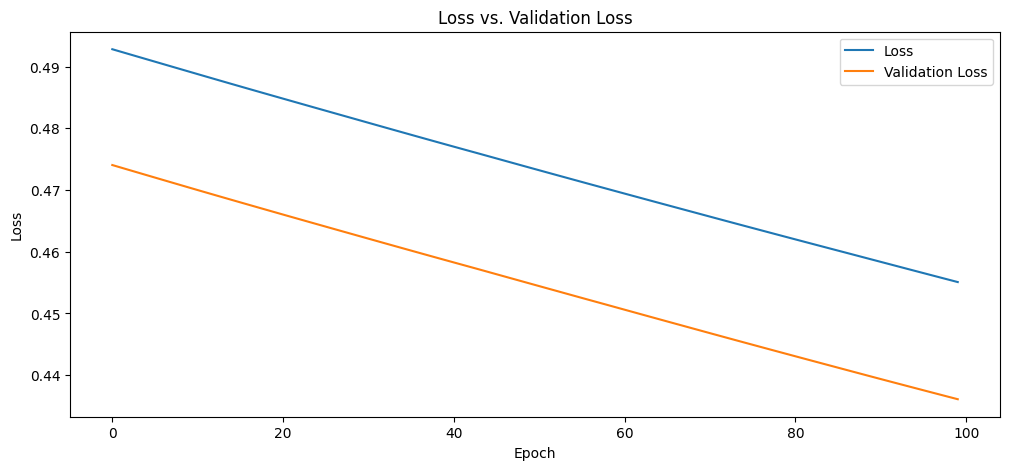

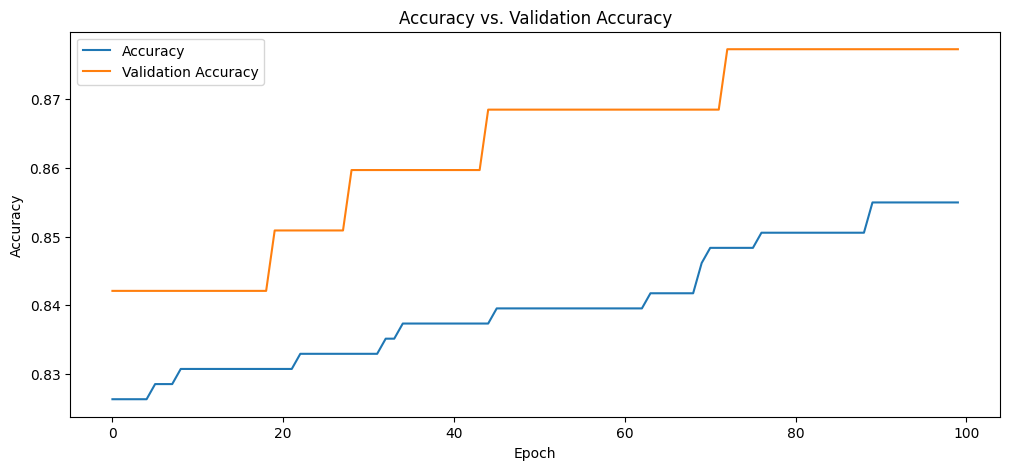

In [23]:
data_path = 'data/data.csv'
df = get_df(data_path)

X_train, X_valid, y_train, y_valid = set_data_for_model(df, 42)

# Convertir etiquetas a one-hot encoding
y_train_one_hot = np.eye(2)[y_train]
y_valid_one_hot = np.eye(2)[y_valid]


input_size = X_train.shape[1]

# Supongamos que ya hemos creado un modelo con las capas que deseamos
model = MLPSequential(input_size, output_size=2, seed=42)

# Añadir capas: una capa oculta de 3 neuronas con activación 'relu'
model.add(10, 'relu')  # Una sola capa con más neuronas
model.add(2, 'softmax')

# Compilar el modelo para inicializar pesos y sesgos
model.compile()



# Entrenar el modelo
model.fit(X_train, y_train_one_hot, epochs=100, learning_rate=0.001, validation_data=(X_valid, y_valid_one_hot), early_stopping_patience=5)

# Graficar la pérdida
plt.figure(figsize=(12, 5))
plt.plot(model.history['loss'], label='Loss')
plt.plot(model.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Validation Loss')
plt.legend()
plt.show()

# Graficar la precisión
plt.figure(figsize=(12, 5))
plt.plot(model.history['accuracy'], label='Accuracy')
plt.plot(model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.legend()
plt.show()